# Week 3 handin

## 01 Assignment

# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

## 03 Solution part 1

In [1]:
# Exercise 1

Exercise 1.5: [12, 10, 7]
Exercise 1.6: 9.666666666666666
Exercise 1.7: 
	- Name: Carl Madsen 
	- Gender: Male 
	- Courses: [[Name: Reading, Classroom: 1.C, Teacher: Hans Talbot, ETCS: Hans Talbot, Grade: 2], [Name: Reading, Classroom: 1.C, Teacher: Hans Talbot, ETCS: Hans Talbot, Grade: 2], [Name: Reading, Classroom: 1.C, Teacher: Hans Talbot, ETCS: Hans Talbot, Grade: 2]] 
	- Image url: https://cdn3.f-cdn.com/contestentries/1376995/30494909/5b566bc71d308_thumb900.jpg
Exercise 1.8.A/1.8.B: [['Ulla Carlsen', 'https://cdn3.f-cdn.com/contestentries/1376995/30494909/5b566bc71d308_thumb900.jpg', 8.0], ['Stine Hansen', 'https://st2.depositphotos.com/1009634/7235/v/600/depositphotos_72350117-stock-illustration-no-user-profile-picture-hand.jpg', 7.0], ['Bent Nielsen', 'https://i.pinimg.com/474x/ce/2a/95/ce2a95e99faceaf7af19c273b10ebcc1.jpg', 6.0], ['Carl Madsen', 'https://st2.depositphotos.com/1009634/7235/v/600/depositphotos_72350117-stock-illustration-no-user-profile-picture-hand.jpg', 1.0]

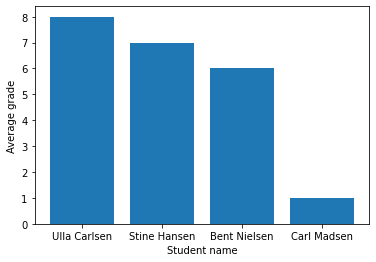

In [41]:
import random
import csv
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

class Student():
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url
    
    def get_average_grade(self):
        result = 0
        grades = self.data_sheet.get_grades_as_list()
        for grade in grades:
            result += grade
        result /= len(grades)
        return result
    
    def calc_study_progression(self):
        result = 0
        for course in self.data_sheet.courses:
            result += course.etcs
        result = ((result/150) * 100)
        return result
        

class DataSheet():
    def __init__(self, courses=[]):
        self.courses = courses
    
    def get_grades_as_list(self):
        grades = []
        for course in self.courses:
            grades.append(course.grade)
        return grades

class Course():
    def __init__(self, name, classroom, teacher, etcs, grade=None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.etcs = etcs
        if grade is not None:
            self.grade = grade
    
    def __str__(self):
        if self.grade is not None:
            return '[Name: ' + str(self.name) + ", Classroom: " + str(self.classroom) + ", Teacher: " + str(self.teacher) + ", ETCS: " + str(self.teacher) + ", Grade: " + str(self.grade) + "]"
        else:
            return '[Name: ' + str(self.name) + ", Classroom: " + str(self.classroom) + ", Teacher: " + str(self.teacher) + ", ETCS: " + str(self.teacher) + "]"

    def __repr__(self):
        return self.__str__()
        
def create_random_student():
    random_names = ['Carl Madsen', 'Bent Nielsen', 'Ulla Carlsen', 'Stine Hansen']
    random_gender = ['Male', 'Female']
    random_grades = [0, 2, 4, 7, 10, 12]
    random_courses = [Course("App Development", "1.A", "Anna Sørensen", 30, random.choice(random_grades)), Course("Reading", "1.C", "Hans Talbot", 25, random.choice(random_grades)), Course("Hacking", "1.B", "Anna Gad", 35, random.choice(random_grades))]
    random_image_url = ['https://cdn3.f-cdn.com/contestentries/1376995/30494909/5b566bc71d308_thumb900.jpg', 'https://st2.depositphotos.com/1009634/7235/v/600/depositphotos_72350117-stock-illustration-no-user-profile-picture-hand.jpg', 'https://i.pinimg.com/474x/ce/2a/95/ce2a95e99faceaf7af19c273b10ebcc1.jpg']
    
    random_student = Student(random.choice(random_names), random.choice(random_gender), DataSheet([random.choice(random_courses), random.choice(random_courses), random.choice(random_courses)]), random.choice(random_image_url))
    
    random_student_coursenames = []
    random_student_teachers = []
    random_student_classrooms = []
    random_student_etcs = []
    random_student_grades = []
    
    for course in random_student.data_sheet.courses:
        random_student_coursenames.append(course.name)
        random_student_teachers.append(course.teacher)
        random_student_classrooms.append(course.classroom)
        random_student_etcs.append(course.etcs)
        random_student_grades.append(course.grade)
    
    random_student_coursenames = list_to_csv(random_student_coursenames)
    random_student_teachers = list_to_csv(random_student_teachers)
    random_student_classrooms = list_to_csv(random_student_classrooms)
    random_student_etcs = list_to_csv(random_student_etcs)
    random_student_grades = list_to_csv(random_student_grades)
    
    with open('data/random_student.csv', 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',')
        csv_writer.writerow((random_student.name, random_student.gender, random_student_coursenames, random_student_teachers, random_student_classrooms, random_student_etcs, random_student_grades, random_student.image_url))
    
    return random_student

def list_to_csv(a_list):
    output = ""
    counter = 0
    for element in a_list:
        if counter == (len(a_list)-1):
            output += str(element)
        else:
            output += str(element) + ";"
        counter += 1
    return output

def students_list_from_csv(csv_file):
    students = []
    
    with open(csv_file, newline='') as file_object:
        csv_reader = csv.reader(file_object, delimiter=',')
        for row in csv_reader:
            courses_obj = {'names': row[2].split(';'), 'teachers': row[3].split(';'), 'classrooms': row[4].split(';'), 'ects': row[5].split(';'), 'grades': row[6].split(';')}
            courses = []
            for i in range(0, len(row[2].split(';'))):
                courses.append(Course(courses_obj.get('names')[i], courses_obj.get('classrooms')[i], courses_obj.get('teachers')[i], int(courses_obj.get('ects')[i]), int(courses_obj.get('grades')[i])))
        
            students.append(Student(row[0], row[1], DataSheet(courses), row[7]))
        
        return students

def print_students(list_of_students):
    output = []
    for student in list_of_students:
        output.append([student.name, student.image_url, student.get_average_grade()])
    
    output.sort(key=itemgetter(2), reverse=True)
    
    return output

def students_grades_bar_chart(print_students_list):
    list_of_student_names = []
    list_of_student_grades = []
    for student in print_students_list:
        list_of_student_names.append(student[0])
        list_of_student_grades.append(student[2])
    plt.bar(list_of_student_names, list_of_student_grades)
    plt.xlabel("Student name")
    plt.ylabel("Average grade")

def students_study_bar_chart(students_list):
    list_of_student_study = []
    percent_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    for student in students_list:
        list_of_student_study.append(snap_study_progression_to_percent(percent_list, student.calc_study_progression()))
    
    study_dict = {}
    
    for percent in percent_list:
        study_dict[percent] = 0
    
    for student_study in list_of_student_study:
        if student_study in percent_list:
            study_dict[student_study] += 1
    
    plt.bar(study_dict.keys(), study_dict.values())
    plt.xlabel("Study progression")
    plt.ylabel("Number of students")

def snap_study_progression_to_percent(percent_list, study_progression):
    percent_list = np.asarray(percent_list) 
    idx = (np.abs(percent_list - study_progression)).argmin() 
    return percent_list[idx]





######## Initialization starts below #########

course_1 = Course("Music", "2.E", "Tommy Wiseau", 30, 12)
course_2 = Course("Programming", "3.E", "Johnny Guy", 35, 10)
course_3 = Course("Language", "1.E", "Emma Madsen", 25, 7)
course_4 = Course("Drinking", "1.F", "Hansy Gimler", 30, 10)
course_5 = Course("Running", "2.F", "Anne Hansen", 25, 7)
course_6 = Course("Reading", "3.F", "Rasmus Nielsen", 30, 4)
courses = [course_1, course_2, course_3]
courses_2 = [course_4, course_5, course_6]
data_sheet = DataSheet(courses)
data_sheet_2 = DataSheet(courses_2)
student = Student("Danny Madsen", "Male", data_sheet, "Url here")
student_2 = Student("Jane Dansen", "Female", data_sheet_2, "Url also here")
random_student = create_random_student()
printed_students = print_students(students_list)
print("Exercise 1.5:", student.data_sheet.get_grades_as_list())
print("Exercise 1.6:", student.get_average_grade())
print("Exercise 1.7:", "\n\t- Name:", random_student.name, "\n\t- Gender:", random_student.gender, "\n\t- Courses:", random_student.data_sheet.courses, "\n\t- Image url:", random_student.image_url)
students_list = students_list_from_csv('data/student_read.csv')
print("Exercise 1.8.A/1.8.B:", printed_students)
print("Exercise 1.8.C:", students_grades_bar_chart(printed_students))
print("Exercise 1.9:", student.calc_study_progression(), "%")

Exercise 1.10: None


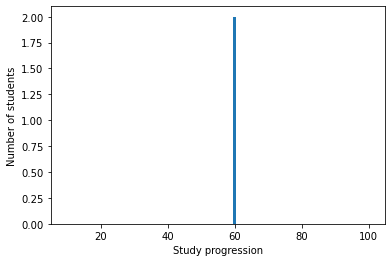

In [42]:
print("Exercise 1.10:", students_study_bar_chart([student, student_2]))

## 04 Solution part 2

In [3]:
# 2.1